# Classificação de celulares

### Importacao de bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [5]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('../mobile.csv')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# balanceamento da base
df1.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [7]:
#vdimnesões da base
df1.shape

(2000, 21)

### Indicar a semente inicial e para divisão da base em treino e teste

In [8]:
np.random.seed(0) # semente inicial
nlinhas = df1.shape[0]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:, df1.columns != 'price_range'], 
                                                    df1.price_range, 
                                                    test_size=0.3, 
                                                    stratify=df1.price_range)

In [10]:
# total do teste
0.3*2000

600.0

In [11]:
# proporção por classe
0.3*500

150.0

In [12]:
# Manter proporções das classes
print(y_test.value_counts())

2    150
0    150
1    150
3    150
Name: price_range, dtype: int64


In [13]:
y_test.shape

(600,)

In [14]:
# alguns dados estatisticos por atributo
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1239.501429,0.490714,1.501571,0.517857,4.294286,0.509286,32.123571,0.500786,139.869286,4.540714,9.881429,650.657143,1251.384286,2130.767857,12.383571,5.885000,10.884286,0.750000,0.507857,0.505714
std,437.142296,0.500092,0.808964,0.499860,4.375410,0.500092,18.008370,0.286919,35.534931,2.305427,5.971239,446.334581,433.670599,1086.180824,4.242390,4.370157,5.462803,0.433167,0.500117,0.500146
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,854.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,285.750000,873.000000,1204.000000,9.000000,2.000000,6.000000,0.750000,0.000000,0.000000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,140.500000,4.000000,10.000000,573.500000,1255.500000,2178.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1614.250000,1.000000,2.200000,1.000000,7.000000,1.000000,47.000000,0.700000,170.000000,7.000000,15.000000,951.000000,1626.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1920.000000,1995.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


## **Normalizando os Dados**

In [15]:
from sklearn.preprocessing import StandardScaler
preprocessParams = StandardScaler().fit(x_train)
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

# Rede Neural

In [16]:
from keras import Sequential
from keras.layers import Dense
#from tensorflow.keras.optimizers import SGD
from keras.optimizers import SGD

Using TensorFlow backend.
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tensorflow/l

In [17]:
NumberOfClasses = len(y_train.unique())
NumberOfClasses

4

In [18]:
RN = Sequential()
RN.add(Dense(20, input_shape=X_train_normalized.shape[1:], activation='sigmoid'))
RN.add(Dense(NumberOfClasses, activation='sigmoid'))
RN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 84        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________


In [19]:
# treinamento
from tensorflow.keras.utils import to_categorical
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
history = RN.fit(X_train_normalized,to_categorical(y_train), epochs = 150, validation_split=0.2)


Train on 1120 samples, validate on 280 samples
Epoch 1/150
1120/1120 [==============================] - 0s 157us/step - loss: 0.1979 - accuracy: 0.3482 - val_loss: 0.1838 - val_accuracy: 0.3214
Epoch 2/150
1120/1120 [==============================] - 0s 51us/step - loss: 0.1744 - accuracy: 0.4393 - val_loss: 0.1700 - val_accuracy: 0.4464
Epoch 3/150
1120/1120 [==============================] - 0s 46us/step - loss: 0.1618 - accuracy: 0.5277 - val_loss: 0.1565 - val_accuracy: 0.5179
Epoch 4/150
1120/1120 [==============================] - 0s 46us/step - loss: 0.1496 - accuracy: 0.5491 - val_loss: 0.1442 - val_accuracy: 0.5571
Epoch 5/150
1120/1120 [==============================] - 0s 49us/step - loss: 0.1388 - accuracy: 0.5473 - val_loss: 0.1342 - val_accuracy: 0.6107
Epoch 6/150
1120/1120 [==============================] - 0s 47us/step - loss: 0.1307 - accuracy: 0.6018 - val_loss: 0.1271 - val_accuracy: 0.6357
Epoch 7/150
1120/1120 [==============================] - 0s 46us/step - los

Epoch 55/150
1120/1120 [==============================] - 0s 51us/step - loss: 0.0572 - accuracy: 0.9375 - val_loss: 0.0588 - val_accuracy: 0.9286
Epoch 56/150
1120/1120 [==============================] - 0s 53us/step - loss: 0.0559 - accuracy: 0.9357 - val_loss: 0.0573 - val_accuracy: 0.9393
Epoch 57/150
1120/1120 [==============================] - 0s 49us/step - loss: 0.0547 - accuracy: 0.9411 - val_loss: 0.0562 - val_accuracy: 0.9500
Epoch 58/150
1120/1120 [==============================] - 0s 47us/step - loss: 0.0534 - accuracy: 0.9420 - val_loss: 0.0550 - val_accuracy: 0.9536
Epoch 59/150
1120/1120 [==============================] - 0s 43us/step - loss: 0.0524 - accuracy: 0.9455 - val_loss: 0.0538 - val_accuracy: 0.9500
Epoch 60/150
1120/1120 [==============================] - 0s 47us/step - loss: 0.0514 - accuracy: 0.9482 - val_loss: 0.0525 - val_accuracy: 0.9571
Epoch 61/150
1120/1120 [==============================] - 0s 50us/step - loss: 0.0500 - accuracy: 0.9491 - val_loss: 0

1120/1120 [==============================] - 0s 42us/step - loss: 0.0225 - accuracy: 0.9830 - val_loss: 0.0237 - val_accuracy: 0.9786
Epoch 111/150
1120/1120 [==============================] - 0s 43us/step - loss: 0.0222 - accuracy: 0.9795 - val_loss: 0.0233 - val_accuracy: 0.9857
Epoch 112/150
1120/1120 [==============================] - 0s 43us/step - loss: 0.0220 - accuracy: 0.9812 - val_loss: 0.0230 - val_accuracy: 0.9857
Epoch 113/150
1120/1120 [==============================] - 0s 51us/step - loss: 0.0218 - accuracy: 0.9786 - val_loss: 0.0229 - val_accuracy: 0.9821
Epoch 114/150
1120/1120 [==============================] - 0s 47us/step - loss: 0.0215 - accuracy: 0.9830 - val_loss: 0.0228 - val_accuracy: 0.9821
Epoch 115/150
1120/1120 [==============================] - 0s 43us/step - loss: 0.0214 - accuracy: 0.9848 - val_loss: 0.0224 - val_accuracy: 0.9857
Epoch 116/150
1120/1120 [==============================] - 0s 44us/step - loss: 0.0210 - accuracy: 0.9804 - val_loss: 0.0223 -

In [20]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.021023522466421127
Test accuracy: 0.9616666436195374


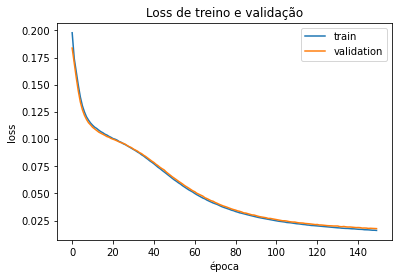

In [21]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss de treino e validação')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

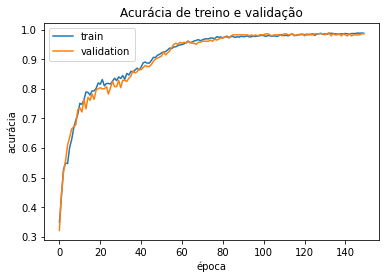

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Acurácia de treino e validação')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend();

In [23]:
# Previsão
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted[0:5]

array([[1.1712313e-05, 1.3846815e-02, 9.1194654e-01, 1.9615650e-02],
       [9.7068214e-01, 2.3044288e-02, 1.4072657e-03, 1.1920929e-07],
       [4.8615932e-03, 9.2157447e-01, 6.0262382e-02, 5.8710575e-06],
       [2.2053719e-06, 1.1766762e-02, 7.7436876e-01, 1.8367511e-01],
       [8.9406967e-08, 5.7041645e-04, 1.5915871e-02, 9.9497676e-01]],
      dtype=float32)

In [24]:
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
print(y_test_predicted_indexes[0:5])
y_test_indexes = y_test.values

[2 0 1 2 3]


In [25]:
# Matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes)
pd.DataFrame(confMatrix, index=['Pred 0', 'Pred 1','Pred 2','Pred 3'], 
             columns=['Real 0', 'Real 1', 'Real 2', 'Real 3'],) #matriz de confusão

,Real 0,Real 1,Real 2,Real 3
Pred 0,146,4,0,0
Pred 1,4,145,7,0
Pred 2,0,1,141,5
Pred 3,0,0,2,145


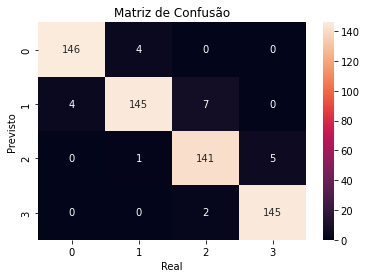

In [26]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['0', '1','2','3']) 
ax.yaxis.set_ticklabels(['0', '1','2','3'])
plt.show()